In [247]:
import pandas as pd
import numpy as np
import seaborn as sns

In [248]:
df1=pd.read_csv('C:/Users/ashiq/Desktop/csv/assignment_4/delivery_time.csv')

In [249]:
df1_copy= df1.copy()

In [250]:
df1_copy

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [251]:
df1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [252]:
df1.shape

(21, 2)

In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [254]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [255]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


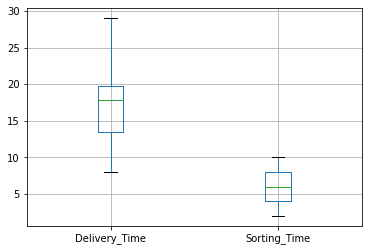

In [256]:
df1.boxplot()

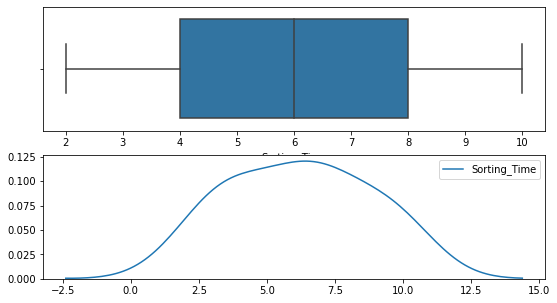

In [257]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(df1['Sorting_Time'])

plt.subplot(212)
sns.kdeplot(df1['Sorting_Time'])



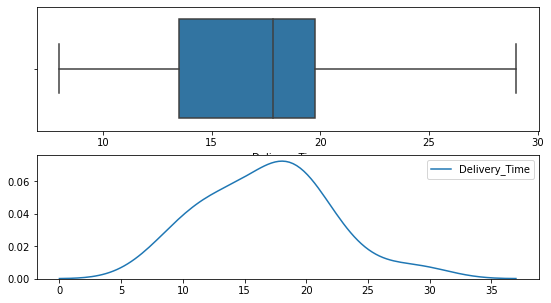

In [258]:
plt.figure(figsize = (9, 5))
plt.subplot(211)
sns.boxplot(df1['Delivery_Time'])

plt.subplot(212)
sns.kdeplot(df1['Delivery_Time'])

In [259]:
from scipy.stats import kurtosis 
from scipy.stats import skew 
(kurtosis(df1['Delivery_Time']),skew(df1['Delivery_Time']))


(-0.02558576894549036, 0.326702631656106)

In [260]:
(kurtosis(df1['Sorting_Time']),skew(df1['Sorting_Time']))

(-1.1653901357029155, 0.043680994983108075)

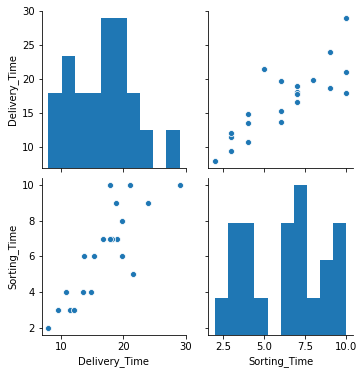

In [261]:
sns.pairplot(df1)

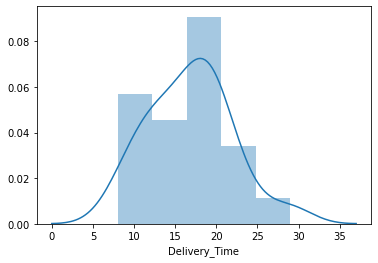

In [262]:
import seaborn as sns
sns.distplot(df1['Delivery_Time'])

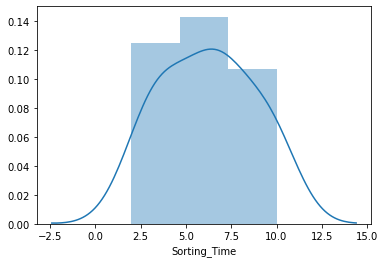

In [263]:
sns.distplot(df1['Sorting_Time'])

In [264]:

import statsmodels.formula.api as smf
model=smf.ols('df1.Delivery_Time~df1.Sorting_Time', data= df1).fit()


In [265]:
model.params

Intercept           6.582734
df1.Sorting_Time    1.649020
dtype: float64

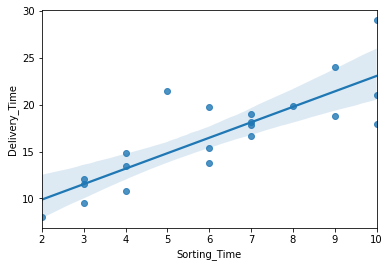

In [266]:
sns.regplot(x=df1.Sorting_Time,y=df1.Delivery_Time, data=df1)

In [267]:
(model.tvalues, model.pvalues)

(Intercept           3.823349
 df1.Sorting_Time    6.387447
 dtype: float64,
 Intercept           0.001147
 df1.Sorting_Time    0.000004
 dtype: float64)

In [268]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# min_max

In [269]:
array=df1_copy.values

In [270]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,:])

In [271]:
rescaledX

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

In [272]:
column_values = ['Delivery_Time','Sorting_Time'] 
df = pd.DataFrame(data = rescaledX,   
                  columns = column_values)

In [273]:
df

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


In [274]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


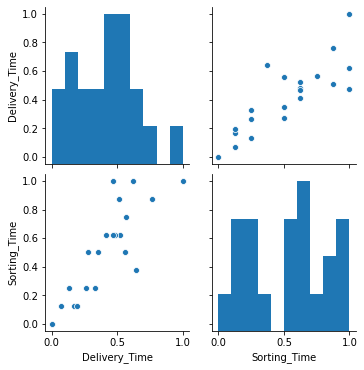

In [275]:
sns.pairplot(df)

In [276]:
model1=smf.ols('df1.Delivery_Time~df1.Sorting_Time', data= df).fit()

In [277]:
model1.params

Intercept           6.582734
df1.Sorting_Time    1.649020
dtype: float64

In [278]:
(model1.tvalues, model1.pvalues)

(Intercept           3.823349
 df1.Sorting_Time    6.387447
 dtype: float64,
 Intercept           0.001147
 df1.Sorting_Time    0.000004
 dtype: float64)

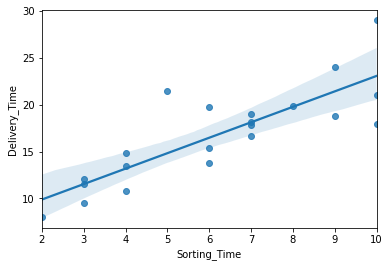

In [279]:
sns.regplot(x=df1.Sorting_Time,y=df1.Delivery_Time, data=df1)

In [280]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# standard scalar 

In [281]:
from sklearn.preprocessing import StandardScaler

In [282]:
array = df1_copy.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

In [283]:
rescaledX

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [284]:
column_values = ['Delivery_Time','Sorting_Time'] 
df3 = pd.DataFrame(data = rescaledX,   
                  columns = column_values)

In [285]:
df3

,Delivery_Time,Sorting_Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [286]:
model2=smf.ols('df3.Delivery_Time~df3.Sorting_Time', data= df3).fit()

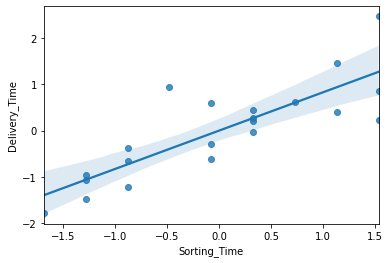

In [287]:
sns.regplot(x=df3.Sorting_Time,y=df3.Delivery_Time, data=df3)

In [288]:
model2.params

Intercept          -5.134781e-16
df3.Sorting_Time    8.259973e-01
dtype: float64

In [289]:
(model2.tvalues, model2.pvalues)

(Intercept          -3.970733e-15
 df3.Sorting_Time    6.387447e+00
 dtype: float64,
 Intercept           1.000000
 df3.Sorting_Time    0.000004
 dtype: float64)

In [290]:
(model2.rsquared,model2.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# exponential

In [291]:
from numpy import exp

In [292]:
data4 = exp(df1_copy)

In [293]:
data4

,Delivery_Time,Sorting_Time
0,1.318816e+09,22026.465795
1,7.294164e+05,54.598150
2,3.778470e+08,403.428793
3,2.648912e+10,8103.083928
4,3.931334e+12,22026.465795
5,4.638956e+06,403.428793
6,1.784823e+08,1096.633158
7,1.335973e+04,20.085537
8,5.941160e+07,22026.465795
9,1.390022e+08,8103.083928


In [294]:
model3=smf.ols('data4.Delivery_Time~data4.Sorting_Time', data= data4).fit()

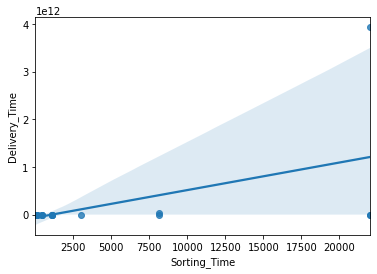

In [295]:
sns.regplot(x=data4.Sorting_Time,y=data4.Delivery_Time, data=data4)

In [296]:
model3.params

Intercept            -6.243560e+10
data4.Sorting_Time    5.779920e+07
dtype: float64

In [297]:
(model3.tvalues, model3.pvalues)

(Intercept            -0.330955
 data4.Sorting_Time    2.675152
 dtype: float64,
 Intercept             0.744301
 data4.Sorting_Time    0.014970
 dtype: float64)

In [298]:
(model3.rsquared,model3.rsquared_adj)

(0.27360134105224776, 0.23536983268657663)

#### 4_model

In [299]:
from sklearn.preprocessing import RobustScaler
array = df1_copy.values

In [300]:
 transformer = RobustScaler().fit_transform(array)

In [301]:
transformer

array([[ 0.5072,  1.    ],
       [-0.6928, -0.5   ],
       [ 0.3072,  0.    ],
       [ 0.9872,  0.75  ],
       [ 1.7872,  1.    ],
       [-0.3968,  0.    ],
       [ 0.1872,  0.25  ],
       [-1.3328, -0.75  ],
       [ 0.0112,  1.    ],
       [ 0.1472,  0.75  ],
       [ 0.32  ,  0.5   ],
       [-1.1328, -0.5   ],
       [-0.184 ,  0.25  ],
       [-1.0128, -0.75  ],
       [-0.928 , -0.75  ],
       [-0.472 , -0.5   ],
       [-0.6528,  0.    ],
       [ 0.0448,  0.25  ],
       [-1.5728, -1.    ],
       [ 0.    ,  0.25  ],
       [ 0.5872, -0.25  ]])

In [302]:
column_values = ['Delivery_Time','Sorting_Time'] 
df4 = pd.DataFrame(data = transformer,   
                  columns = column_values)

In [303]:
model4=smf.ols('df4.Delivery_Time~df4.Sorting_Time', data= df4).fit()

In [304]:
model4.params

Intercept          -0.216503
df4.Sorting_Time    1.055373
dtype: float64

In [305]:
(model4.tvalues, model4.pvalues)

(Intercept          -2.106611
 df4.Sorting_Time    6.387447
 dtype: float64,
 Intercept           0.048673
 df4.Sorting_Time    0.000004
 dtype: float64)

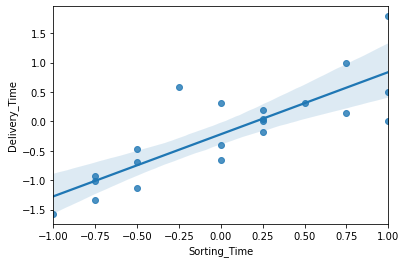

In [306]:
sns.regplot(x=df4.Sorting_Time,y=df4.Delivery_Time, data=df4)

In [307]:
(model4.rsquared,model4.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)